In [2]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
from astropy.table import Table, vstack
import hdbscan
from pathlib import Path
import seaborn as sns
import glob
import json
%matplotlib inline
sns.set_color_codes()

In [3]:
ROOT_PATH = Path("..") 

In [4]:
table = Table.read("Good-LD-Halpha-DR3_noFlag_merge.ecsv", format="ascii.ecsv")

In [5]:

len(table)

8817

In [7]:
table.colnames

['Field',
 'ID',
 'RA',
 'DEC',
 'FWHM',
 'ISOarea',
 'KRON_RADIUS',
 'nDet_magPStotal',
 'PhotoFlagDet',
 'U_PStotal',
 'F378_PStotal',
 'F395_PStotal',
 'F410_PStotal',
 'F430_PStotal',
 'G_PStotal',
 'F515_PStotal',
 'R_PStotal',
 'F660_PStotal',
 'I_PStotal',
 'F861_PStotal',
 'Z_PStotal',
 'e_U_PStotal',
 'e_F378_PStotal',
 'e_F395_PStotal',
 'e_F410_PStotal',
 'e_F430_PStotal',
 'e_G_PStotal',
 'e_F515_PStotal',
 'e_R_PStotal',
 'e_F660_PStotal',
 'e_I_PStotal',
 'e_F861_PStotal',
 'e_Z_PStotal',
 'r - i',
 'r - J0660',
 'e(r - i)',
 'e(r - J0660)',
 'P(GoodPho)',
 'P(BadPho)']

In [8]:
# Colors
m =  (table["e_G_PStotal"] <= 0.2) & (table["e_R_PStotal"] <= 0.2) & (table["e_Z_PStotal"] <= 0.2)
zg = table['Z_PStotal'][m] - table['G_PStotal'][m]
gr = table['G_PStotal'][m] - table['R_PStotal'][m]

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


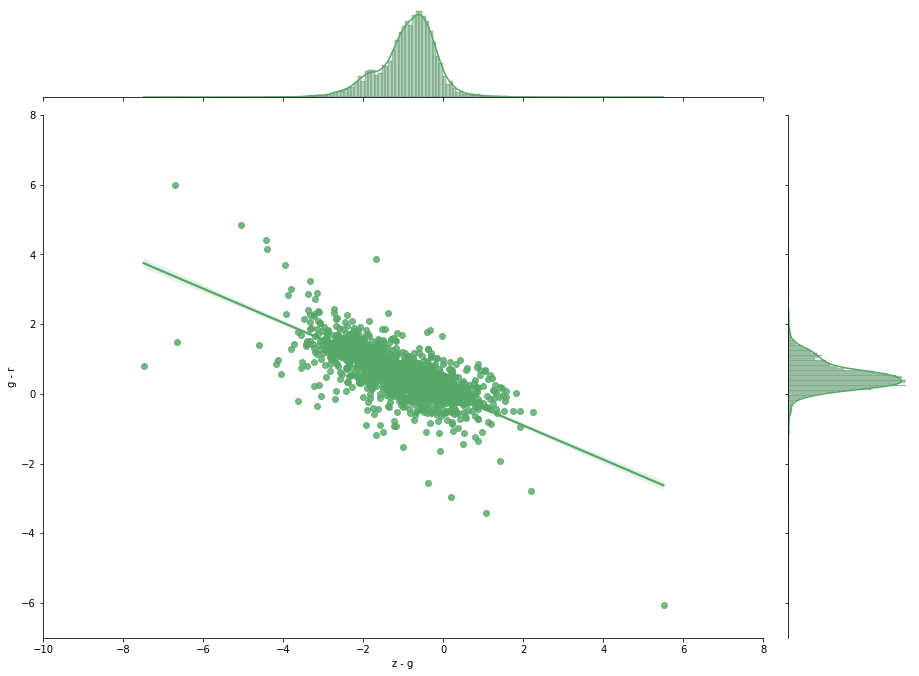

In [10]:
ax = sns.jointplot(zg, gr, kind="reg", color="g")
ax.ax_joint.set(xlim=[-10, 8], ylim=[-7, 8],
               xlabel=r"z - g",
    ylabel=r"g - r")
#ax.ax_joint.set_aspect("equal")
ax.fig.set_size_inches(14, 10)